<a href="https://colab.research.google.com/github/RaoUmair98/BirdsCLEF-Voice/blob/main/birdsclef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%ls

test.csv                     XC109605.ogg  XC129974.ogg
train_metadata.csv           XC11209.ogg   XC129981.ogg
train_soundscape_labels.csv  XC127032.ogg  XC402426.ogg


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('train_metadata.csv',)
train.head()

primary_label secondary_labels  ...   time                                url
0        acafly       ['amegfi']  ...  09:30  https://www.xeno-canto.org/109605
1        acafly               []  ...      ?   https://www.xeno-canto.org/11209
2        acafly               []  ...  15:20  https://www.xeno-canto.org/127032
3        acafly      ['whwbec1']  ...  07:50  https://www.xeno-canto.org/129974
4        acafly      ['whwbec1']  ...  07:50  https://www.xeno-canto.org/129981

[5 rows x 14 columns]

In [ ]:
train.describe()

latitude     longitude        rating
count  62874.000000  62874.000000  62874.000000
mean      24.472805    -79.960828      3.755360
std       22.108481     38.370726      1.220135
min      -53.162000   -165.781200      0.000000
25%        6.246000   -108.976100      3.500000
50%       31.741400    -81.553400      4.000000
75%       41.198700    -73.133333      4.500000
max       78.928100    179.360700      5.000000

In [ ]:
train.dtypes

primary_label        object
secondary_labels     object
type                 object
latitude            float64
longitude           float64
scientific_name      object
common_name          object
author               object
date                 object
filename             object
license              object
rating              float64
time                 object
url                  object
dtype: object

In [ ]:
train.isnull()

primary_label  secondary_labels   type  ...  rating   time    url
0              False             False  False  ...   False  False  False
1              False             False  False  ...   False  False  False
2              False             False  False  ...   False  False  False
3              False             False  False  ...   False  False  False
4              False             False  False  ...   False  False  False
...              ...               ...    ...  ...     ...    ...    ...
62869          False             False  False  ...   False  False  False
62870          False             False  False  ...   False  False  False
62871          False             False  False  ...   False  False  False
62872          False             False  False  ...   False  False  False
62873          False             False  False  ...   False  False  False

[62874 rows x 14 columns]

In [ ]:
train.isnull().sum()

primary_label       0
secondary_labels    0
type                0
latitude            0
longitude           0
scientific_name     0
common_name         0
author              0
date                0
filename            0
license             0
rating              0
time                0
url                 0
dtype: int64

In [ ]:
data = df[["latitude","longitude"]]
Correlation = train.corr(method='kendall')
print(Correlation)

NameError: ignored

In [ ]:
len(train['primary_label'].value_counts())


397

In [ ]:
import plotly.graph_objects as go
species = train['primary_label'].value_counts()
fig = go.Figure(data=[go.Bar(y=species.values, x=species.index)],
                layout=go.Layout(margin=go.layout.Margin(l=0, r=0,
b=15, t=50)))

fig.update_layout(title='Number of traning samples per species')
fig.show()                                                        

In [ ]:
train['secondary_labels'].value_counts()


[]                                                     41358
['rewbla']                                               292
['amerob']                                               235
['houspa']                                               218
['norcar']                                               205
                                                       ...  
['norwat', 'amered', 'chispa', 'warvir']                   1
['cacwre', 'bncfly', 'moudov', 'blugrb1', 'caskin']        1
['blujay', 'buggna']                                       1
['rubpep1', 'houwre', 'trokin']                            1
['yerwar', 'purfin']                                       1
Name: secondary_labels, Length: 10918, dtype: int64

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 4.2MB/s 
     |████████████████████████████████| 6.5MB 22.4MB/s 
     |████████████████████████████████| 15.3MB 40.8MB/s 


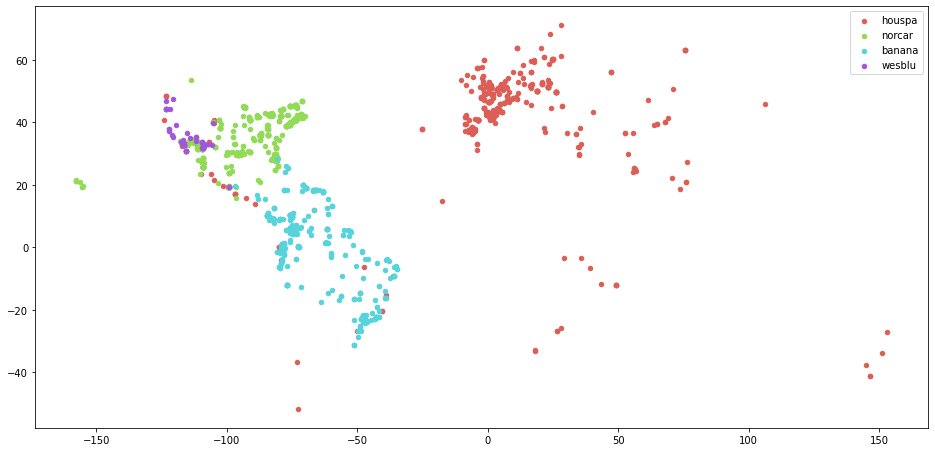

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon




crs = {"init" : "epsg:4326"}


species_list = ['norcar', 'houspa', 'wesblu', 'banana']
data = train[train['primary_label'].isin(species_list)]
data["latitude"] = data["latitude"].astype(float)
data["longitude"] = data["longitude"].astype(float)


geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]


geo_df = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)


species_id = geo_df["primary_label"].value_counts().reset_index()
species_id.insert(0, 'ID', range(0, 0 + len(species_id)))

species_id.columns = ["ID", "primary_label", "count"]
geo_df = pd.merge(geo_df, species_id, how="left", on="primary_label")


fig, ax = plt.subplots(figsize = (16, 10))

palette = iter(sns.hls_palette(len(species_id)))
for i in range(len(species_list)):
    geo_df[geo_df["ID"] == i].plot(ax=ax, 
                                   markersize=20, 
                                   color=next(palette), 
                                   marker="o", 
                                   label = species_id['primary_label'].values[i]);
    
ax.legend()

In [ ]:
hist_data = train['rating'].values.tolist()
fig = go.Figure(data=[go.Histogram(x=hist_data)], 
                layout=go.Layout(margin=go.layout.Margin(l=0, r=0, b=10, t=50)))
fig.update_layout(title='Number of recordings per rating')

fig.show()

In [ ]:
%ls

test.csv                     XC109605.ogg  XC129974.ogg
train_metadata.csv           XC11209.ogg   XC129981.ogg
train_soundscape_labels.csv  XC127032.ogg  XC402426.ogg


In [ ]:
soundscapes = pd.read_csv('train_soundscape_labels.csv',)
soundscapes.head()

row_id site  audio_id  seconds   birds
0   7019_COR_5  COR      7019        5  nocall
1  7019_COR_10  COR      7019       10  nocall
2  7019_COR_15  COR      7019       15  nocall
3  7019_COR_20  COR      7019       20  nocall
4  7019_COR_25  COR      7019       25  nocall

In [ ]:
print(soundscapes['birds'].value_counts())

nocall             1529
rucwar              149
bobfly1              77
reevir1              57
rewbla               52
                   ... 
haiwoo rewbla         1
balori comgra         1
runwre1 yehcar1       1
hofwoo1 whcpar        1
gockin rewbla         1
Name: birds, Length: 109, dtype: int64


# Processing the audio

In [ ]:
%ls

test.csv                     XC109605.ogg  XC129974.ogg
train_metadata.csv           XC11209.ogg   XC129981.ogg
train_soundscape_labels.csv  XC127032.ogg  XC402426.ogg


In [ ]:
audio_path = 'XC109605.ogg'

# Listen to it
import IPython.display as ipd
ipd.Audio(audio_path)

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# Librosa is the most versatile audio library for Python 
# and uses FFMPEG to load and open audio files
# For more information visit: https://librosa.org/doc/latest/index.html
import librosa

# Load the first 15 seconds this file using librosa
sig, rate= librosa.load(audio_path, sr=32000, offset=None, duration=15)

# The result is a 1D numpy array that conatains audio samples. 
# Take a look at the shape (seconds * sample rate == 15 * 32000 == 480000)
print('SIGNAL SHAPE:', sig.shape)

SIGNAL SHAPE: (480000,)


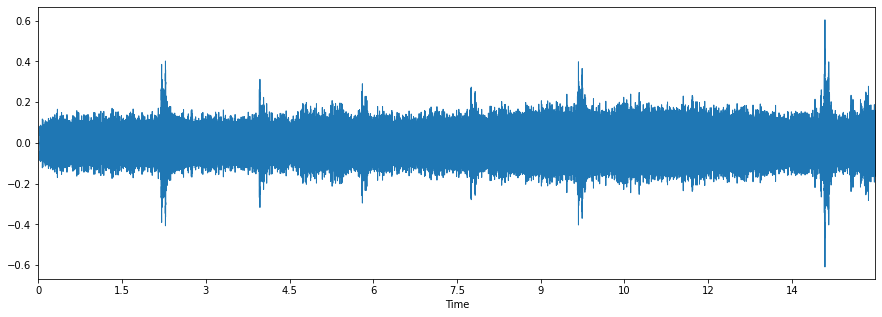

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(sig, sr=32000)

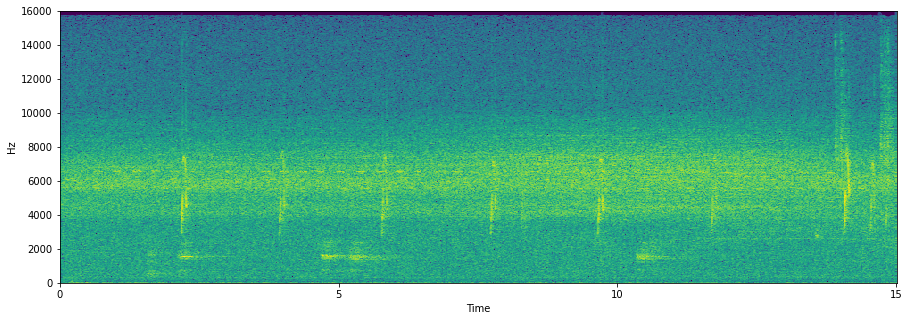

In [ ]:
spec = librosa.stft(sig)
spec_db = librosa.amplitude_to_db(spec, ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(spec_db, 
                         sr=32000, 
                         x_axis='time', 
                         y_axis='hz', 
                         cmap=plt.get_cmap('viridis'))

In [ ]:
print('SPEC SHAPE:', spec_db.shape)


SPEC SHAPE: (1025, 938)


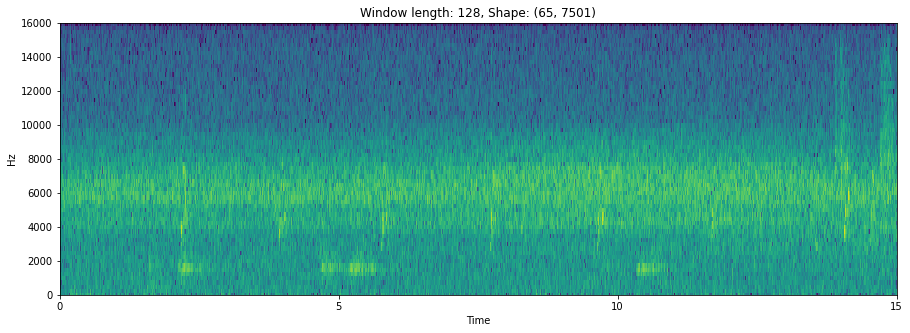

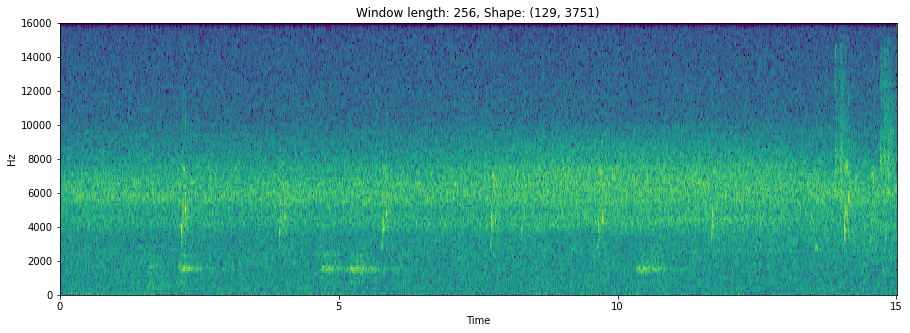

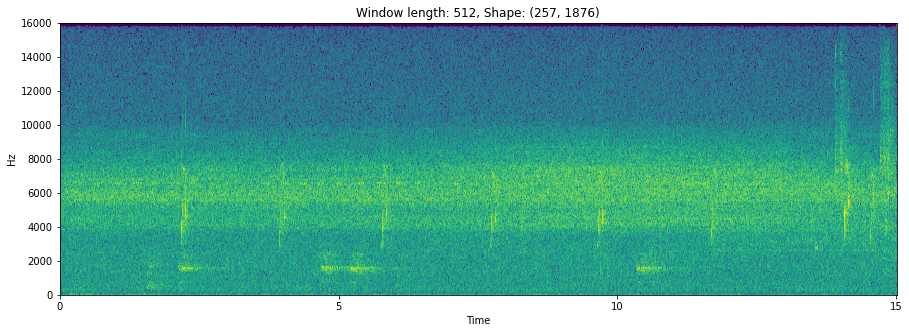

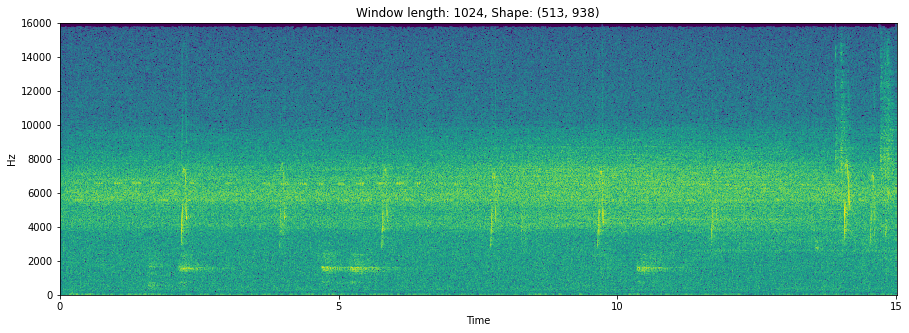

In [ ]:
# Try a few window lengths (should be a power of 2)
for win_length in [128, 256, 512, 1024]:
    
    # We want 50% overlap between samples
    hop_length = win_length // 2
    
    # Compute spec (win_length implicity also sets n_fft and vice versa)
    spec = librosa.stft(sig, 
                        n_fft=win_length, 
                        hop_length=hop_length)
    
    # Scale to decibel scale
    spec_db = librosa.amplitude_to_db(spec, ref=np.max)
    
    # Show plot
    plt.figure(figsize=(15, 5))
    plt.title('Window length: ' + str(win_length) + ', Shape: ' + str(spec_db.shape))
    librosa.display.specshow(spec_db, 
                             sr=32000, 
                             hop_length=hop_length, 
                             x_axis='time', 
                             y_axis='hz', 
                             cmap=plt.get_cmap('viridis'))

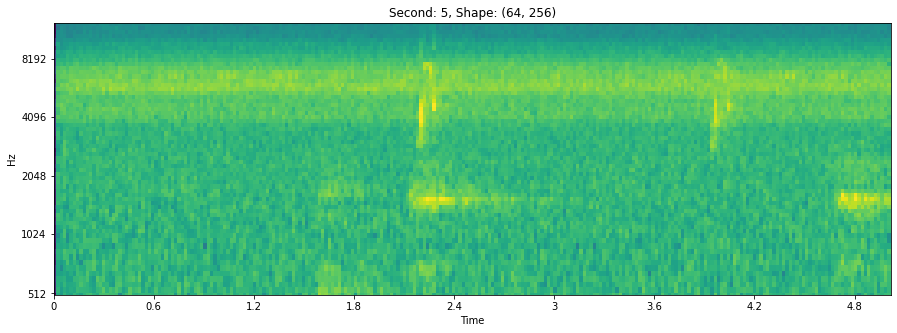

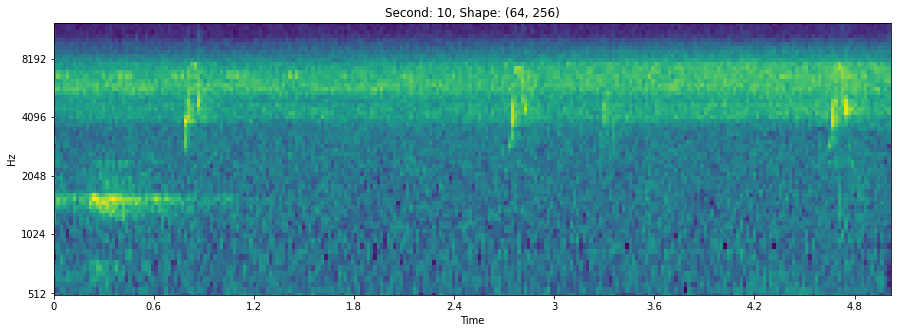

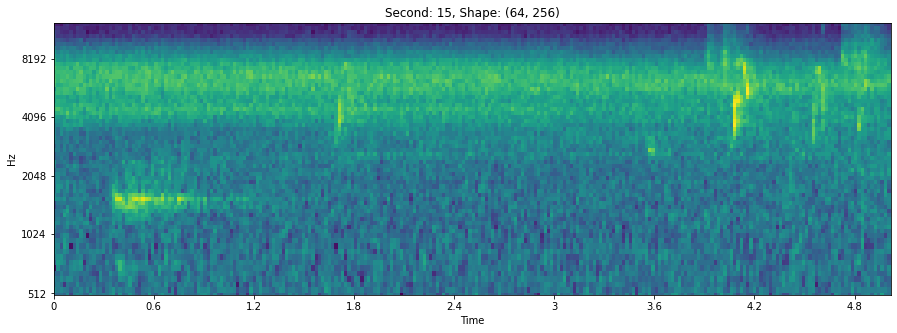

In [ ]:
# Desired shape of the input spectrogram
SPEC_HEIGHT = 64
SPEC_WIDTH = 256

# Derive num_mels and hop_length from desired spec shape
# num_mels is easy, that's just spec_height
# hop_length is a bit more complicated
NUM_MELS = SPEC_HEIGHT
HOP_LENGTH = int(32000 * 5 / (SPEC_WIDTH - 1)) # sample rate * duration / spec width - 1 == 627

# High- and low-pass frequencies
# For many birds, these are a good choice
FMIN = 500
FMAX = 12500

# Let's get all three spectrograms
for second in [5, 10, 15]:  
    
    # Get start and stop sample
    s_start = (second - 5) * 32000
    s_end = second * 32000

    # Compute the spectrogram and apply the mel scale
    mel_spec = librosa.feature.melspectrogram(y=sig[s_start:s_end], 
                                              sr=32000, 
                                              n_fft=1024, 
                                              hop_length=HOP_LENGTH, 
                                              n_mels=NUM_MELS, 
                                              fmin=FMIN, 
                                              fmax=FMAX)
    
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Show the spec
    plt.figure(figsize=(15, 5))
    plt.title('Second: ' + str(second) + ', Shape: ' + str(mel_spec_db.shape))
    librosa.display.specshow(mel_spec_db, 
                             sr=32000, 
                             hop_length=HOP_LENGTH, 
                             x_axis='time', 
                             y_axis='mel',
                             fmin=FMIN, 
                             fmax=FMAX, 
                             cmap=plt.get_cmap('viridis'))

# Training the Model

In [ ]:
import os

import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import librosa
import numpy as np

from sklearn.utils import shuffle
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf

# Global vars
RANDOM_SEED = 1337
SAMPLE_RATE = 32000
SIGNAL_LENGTH = 5 # seconds
SPEC_SHAPE = (48, 128) # height x width
FMIN = 500
FMAX = 12500
MAX_AUDIO_FILES = 1500

In [ ]:
train = pd.read_csv('train_metadata.csv',)
train = train.query('rating>=4')
birds_count = {}
for bird_species, count in zip(train.primary_label.unique(), 
                               train.groupby('primary_label')['primary_label'].count().values):
    birds_count[bird_species] = count
most_represented_birds = [key for key,value in birds_count.items() if value >= 200] 

TRAIN = train.query('primary_label in @most_represented_birds')
LABELS = sorted(TRAIN.primary_label.unique())

# Let's see how many species and samples we have left
print('NUMBER OF SPECIES IN TRAIN DATA:', len(LABELS))
print('NUMBER OF SAMPLES IN TRAIN DATA:', len(TRAIN))
print('LABELS:', most_represented_birds)


NUMBER OF SPECIES IN TRAIN DATA: 27
NUMBER OF SAMPLES IN TRAIN DATA: 8548
LABELS: ['amerob', 'barswa', 'bewwre', 'blujay', 'bncfly', 'carwre', 'compau', 'comrav', 'comyel', 'eursta', 'gbwwre1', 'grekis', 'houspa', 'houwre', 'mallar3', 'norcar', 'normoc', 'redcro', 'rewbla', 'roahaw', 'rubpep1', 'rucspa1', 'sonspa', 'spotow', 'wbwwre1', 'wesmea', 'yeofly1']


In [ ]:
MAX_AUDIO_FILES
TRAIN = shuffle(TRAIN, random_state=RANDOM_SEED)[:MAX_AUDIO_FILES]

def get_spectrograms(filepath, primary_label, output_dir):
    
    
    sig, rate = librosa.load(filepath, sr=SAMPLE_RATE, offset=None, duration=15)
    
   
    sig_splits = []
    for i in range(0, len(sig), int(SIGNAL_LENGTH * SAMPLE_RATE)):
        split = sig[i:i + int(SIGNAL_LENGTH * SAMPLE_RATE)]

       
        if len(split) < int(SIGNAL_LENGTH * SAMPLE_RATE):
            break
        
        sig_splits.append(split)
        
    
    s_cnt = 0
    saved_samples = []
    for chunk in sig_splits:
        
        hop_length = int(SIGNAL_LENGTH * SAMPLE_RATE / (SPEC_SHAPE[1] - 1))
        mel_spec = librosa.feature.melspectrogram(y=chunk, 
                                                  sr=SAMPLE_RATE, 
                                                  n_fft=1024, 
                                                  hop_length=hop_length, 
                                                  n_mels=SPEC_SHAPE[0], 
                                                  fmin=FMIN, 
                                                  fmax=FMAX)
    
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max) 
        
        
        mel_spec -= mel_spec.min()
        mel_spec /= mel_spec.max()
        
        
        save_dir = os.path.join(output_dir, primary_label)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, filepath.rsplit(os.sep, 1)[-1].rsplit('.', 1)[0] + 
                                 '_' + str(s_cnt) + '.png')
        im = Image.fromarray(mel_spec * 255.0).convert("L")
        im.save(save_path)
        
        saved_samples.append(save_path)
        s_cnt += 1
        
        
    return saved_samples

print('FINAL NUMBER OF AUDIO FILES IN TRAINING DATA:', len(TRAIN)) 

FINAL NUMBER OF AUDIO FILES IN TRAINING DATA: 1500


In [ ]:
%ls

test.csv                     XC109605.ogg  XC129974.ogg
train_metadata.csv           XC11209.ogg   XC129981.ogg
train_soundscape_labels.csv  XC127032.ogg  XC402426.ogg


In [ ]:
%ls
# Parse audio files and extract training samples
input_dir = 'XC109605.ogg'
output_dir = 'XC402426.ogg'
samples = []
with tqdm(total=len(TRAIN)) as pbar:
    for idx, row in TRAIN.iterrows():
        pbar.update(1)
        
        if row.primary_label in most_represented_birds:
            audio_file_path = os.path.join(input_dir, row.primary_label, row.filename)
            samples += get_spectrograms(audio_file_path, row.primary_label, output_dir)
            
TRAIN_SPECS = shuffle(samples, random_state=RANDOM_SEED)
print('SUCCESSFULLY EXTRACTED {} SPECTROGRAMS'.format(len(TRAIN_SPECS)))

test.csv                     XC109605.ogg  XC129974.ogg
train_metadata.csv           XC11209.ogg   XC129981.ogg
train_soundscape_labels.csv  XC127032.ogg  XC402426.ogg


  0%|          | 1/1500 [00:01<30:39,  1.23s/it]


NotADirectoryError: ignored

In [ ]:
for i in range(12):
    spec = Image.open(TRAIN_SPECS[i])
    plt.subplot(3, 4, i + 1)
    plt.title(TRAIN_SPECS[i].split(os.sep)[-1])
    plt.imshow(spec, origin='lower')

NameError: ignored

In [ ]:
train_specs, train_labels = [], []
with tqdm(total=len(TRAIN_SPECS)) as pbar:
    for path in TRAIN_SPECS:
        pbar.update(1)

        # Open image
        spec = Image.open(path)

        # Convert to numpy array
        spec = np.array(spec, dtype='float32')
        
        # Normalize between 0.0 and 1.0
        # and exclude samples with nan 
        spec -= spec.min()
        spec /= spec.max()
        if not spec.max() == 1.0 or not spec.min() == 0.0:
            continue

        # Add channel axis to 2D array
        spec = np.expand_dims(spec, -1)

        # Add new dimension for batch size
        spec = np.expand_dims(spec, 0)

        # Add to train data
        if len(train_specs) == 0:
            train_specs = spec
        else:
            train_specs = np.vstack((train_specs, spec))

        # Add to label data
        target = np.zeros((len(LABELS)), dtype='float32')
        bird = path.split(os.sep)[-2]
        target[LABELS.index(bird)] = 1.0
        if len(train_labels) == 0:
            train_labels = target
        else:
            train_labels = np.vstack((train_labels, target))


NameError: ignored